# Example Gas Mileage Ratings for 100 Cars with Pandas

Check for Normal Data

     MPG
0   36.3
1   41.0
2   36.9
3   37.1
4   44.9
..   ...
95  34.0
96  36.8
97  35.0
98  38.1
99  36.9

[100 rows x 1 columns]


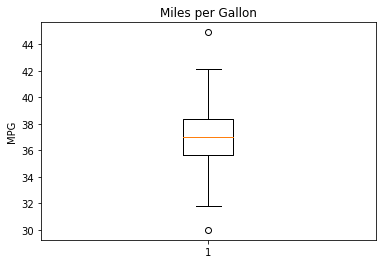

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as sts
%matplotlib inline

df = pd.read_csv('EPAGAS.CSV')
print(df)
plt.title('Miles per Gallon')
plt.boxplot(df['MPG'])
plt.ylabel('MPG')
plt.show()

1. Histogram is mound shaped and symmetric ?

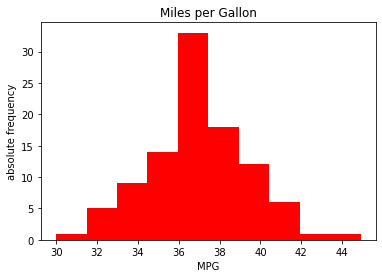

In [2]:
plt.figure()

plt.hist(df['MPG'], bins=10, color='r')
plt.title('Miles per Gallon')
plt.xlabel('MPG')
plt.ylabel('absolute frequency')
plt.show()

2. Compute the percentage of measurements falling in the intervals

In [3]:
xb = df['MPG'].mean()
#xb = np.mean(df['MPG'])
s = df['MPG'].std(ddof = 1)
#s = np.std(df['MPG'],ddof = 1)
n = len(df)



print('mean : ', xb)
print('std : ',s)
print('sample size n : ',n)

df2 = (df['MPG']> xb-s) & (df['MPG'] < xb+s)

print(df2)

df2 = df2.value_counts()
print(df2)
print('fraction of elements 1s (68% expected): ',df2.loc[True]/n)

df2 = (df['MPG']> xb-2*s) & (df['MPG'] < xb+2*s)
df2 = df2.value_counts()
print('fraction of elements 2s (95% expected): ',df2.loc[True]/n)

df2 = (df['MPG']> xb-3*s) & (df['MPG'] < xb+3*s)
df2 = df2.value_counts()
print('fraction of elements 3s (100% expected): ',df2.loc[True]/n)


mean :  36.99400000000001
std :  2.417897074448427
sample size n :  100
0      True
1     False
2      True
3      True
4     False
      ...  
95    False
96     True
97     True
98     True
99     True
Name: MPG, Length: 100, dtype: bool
True     68
False    32
Name: MPG, dtype: int64
fraction of elements 1s (68% expected):  0.68
fraction of elements 2s (95% expected):  0.96
fraction of elements 3s (100% expected):  0.99


3. IQR/s = 1.3

In [4]:
qa = df['MPG'].quantile([0.25,0.75])
print(qa)

print('lower quartile : ',qa.loc[0.25])
print('upper quartile : ',qa.loc[0.75])
iqr = qa.loc[0.75] - qa.loc[0.25]

print('iqr/s = ',iqr/s)



0.25    35.675
0.75    38.325
Name: MPG, dtype: float64
lower quartile :  35.675000000000004
upper quartile :  38.324999999999996
iqr/s =  1.0959937161942728


4. Normal probability plot
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html



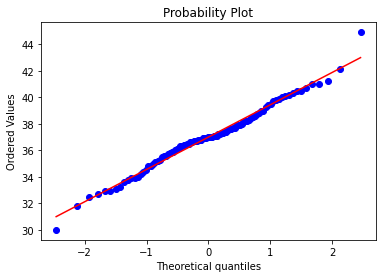

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)
res = sts.probplot(df['MPG'],plot = ax)
